In [1]:
import torch
from dataset_class import dataset,params2theta,theta2params
#import dataset_class as dc
import pandas as pd
from matplotlib import pyplot as plt


In [2]:
def load_dataset(filename,Nmax=10**1000,remove_zeros=True,cutoff=50):
    df=pd.read_csv(filename)[:Nmax]
    cts,dils = df['Counts'].to_numpy(),df['Dilution'].to_numpy().astype(float)
    if remove_zeros:
        cts,dils = cts[cts!=0],dils[cts!=0]
    return dataset(cts,dils,cutoff)

In [3]:
data = load_dataset('synth_data/synth_unimodal.csv',Nmax=1000,cutoff=-1)
th_gt = params2theta(*torch.tensor((8000,500,1.)))


In [4]:
data.loglike(th_gt.to(data.device),th_gt.size(0)//3).sum()

tensor(-3333.1902, device='cuda:0', dtype=torch.float64)

In [5]:
data.evaluate(tol=1e-5,lr=.05,components=1)

3.3903554224091352 -3357.435530821485 -24.981598480047225
3.3641459267542726 -3343.360405966113 -23.404768028738495
3.3565747261504275 -3334.371153402876 -22.029621234572225
3.354783219746445 -3333.315163806691 -20.991118657992967
3.354323933621064 -3333.2949036634004 -21.004111074232867
3.354019691090905 -3332.835485543082 -21.255838249032166
3.353868275664662 -3332.79068109532 -21.10424432426963
3.3538772936449517 -3332.799573421792 -21.082551225574647


(tensor([8038.7619], device='cuda:0', dtype=torch.float64),
 tensor([502.4856], device='cuda:0', dtype=torch.float64),
 tensor([1.], device='cuda:0', dtype=torch.float64))

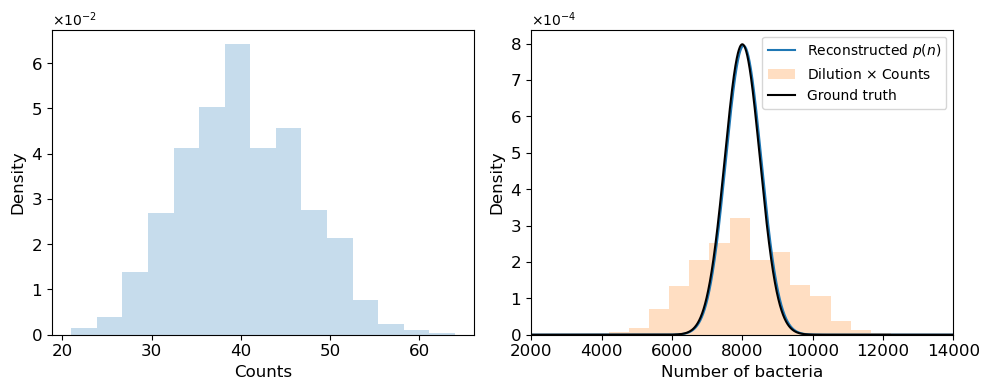

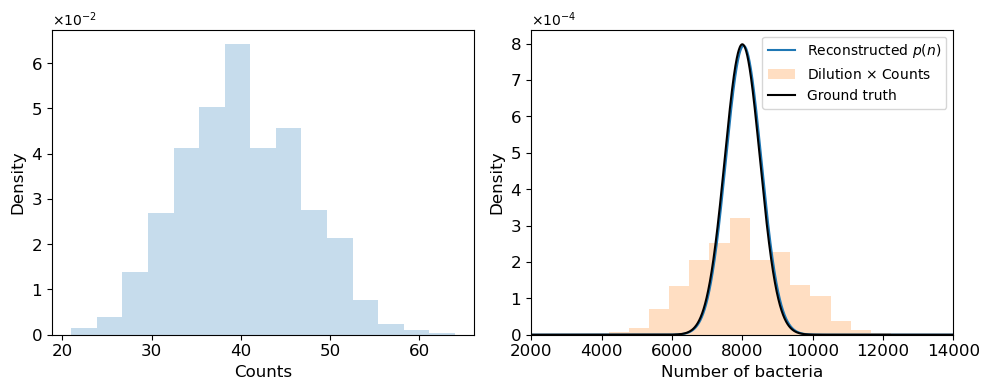

In [6]:
data.make_plot('graphs/synth/unimodal_{}.png'.format(th_gt.numpy()),th_gt)

In [7]:
del data.lpkdil_n
del data

In [8]:
data2 = load_dataset('synth_data/synth_multimodal_harder.csv',Nmax=1000,cutoff=-1)
th_gt = params2theta(*torch.tensor(((4000,8000,14000),
                                   (200,1500,1000),
                                   (.25,.4,.35))))


In [9]:
data2.loglike(th_gt.to(data2.device),th_gt.size(0)//3).sum()

tensor(-4335.3454, device='cuda:0', dtype=torch.float64)

In [10]:
data2.evaluate(tol=1e-5,lr=.05)

4.891569251199958 -4333.395430936073 -552.1465152087736
4.838267318236548 -4332.586332871619 -501.3263852579815
4.802317998136812 -4332.836214403592 -466.8094571072623
4.779868416583236 -4333.21659728944 -445.02456834741156
4.767019755681623 -4333.977572862756 -432.08558546742165
4.7596648524684895 -4334.331444961121 -424.8662491714077
4.757272548729029 -4335.887408996488 -421.24367738908256
4.756138952247496 -4335.342693677956 -420.72941444833685


(tensor([13949.0778,  8068.7733,  4077.5122, 13784.8624,  7940.7640, 13618.0516,
          7997.1877,  7795.8473,  4110.9865, 12821.2306,  4112.1709,  4091.4081,
          6836.2994,  9667.4508,  4055.4039,  4040.1466,  3981.9328,  3864.1358,
          3697.8560,  2912.5213,  5178.8381,  3165.8678,  2778.8613,  4317.0245],
        device='cuda:0', dtype=torch.float64),
 tensor([ 994.5997,  988.6675,  353.9001, 1267.6832, 1044.8485, 1321.6424,
         1274.8469, 1245.0150,  548.8338, 1811.8802,  612.3790,  667.3769,
         1688.6336, 2491.9457,  729.8925,  788.0957,  806.8506,  795.1540,
          791.0693,  719.6798, 1720.6038,  812.7924,  683.4547, 1531.4628],
        device='cuda:0', dtype=torch.float64),
 tensor([0.1268, 0.1159, 0.1119, 0.0929, 0.0918, 0.0831, 0.0623, 0.0483, 0.0459,
         0.0407, 0.0348, 0.0254, 0.0243, 0.0237, 0.0172, 0.0142, 0.0119, 0.0092,
         0.0062, 0.0032, 0.0030, 0.0029, 0.0025, 0.0021], device='cuda:0',
        dtype=torch.float64))

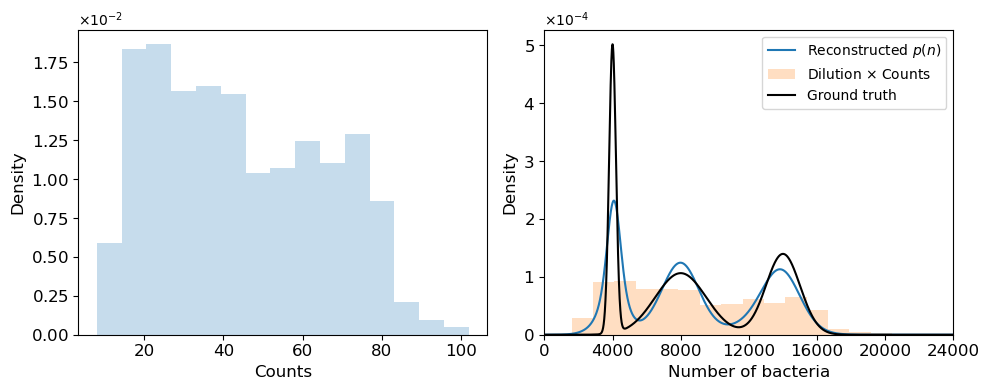

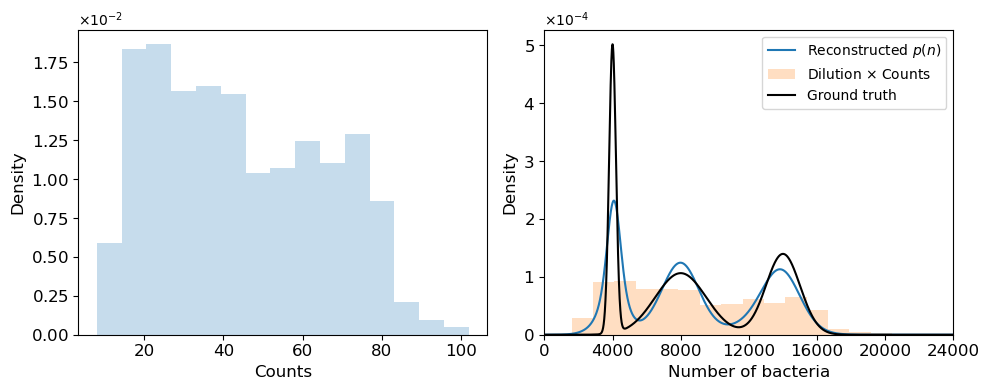

In [11]:
data2.make_plot('graphs/synth/multimodal_harder.png'.format(th_gt.numpy()),th_gt)

In [12]:
del data2.lpkdil_n
del data2

In [13]:
data3 = load_dataset('synth_data/synth_multimodal_easier.csv',Nmax=2000,cutoff=-1)
th_gt = params2theta(*torch.tensor(((8000,16000,24000),
                                   (1000,1000,1000),
                                   (.3,.2,.5))))

In [14]:
data3.loglike(th_gt.to(data3.device),th_gt.size(0)//3).sum()

tensor(-9385.6717, device='cuda:0', dtype=torch.float64)

In [15]:
data3.evaluate(tol=1e-5,lr=.05)

5.004322086081204 -9392.079230427997 -613.3239258106366
4.97556888660333 -9383.133071584438 -564.0012064239721
4.956618871741961 -9381.82767192711 -528.3197151753616
4.9432968893052 -9383.049502429996 -501.31801241617194
4.934905286587194 -9385.477835802903 -483.11148993649584
4.930865065199168 -9387.432672010907 -473.88395226536795
4.928888256376792 -9385.833405807534 -471.66357819274674


(tensor([24150.6792, 15906.0587, 24113.5807,  8100.0487, 23977.8548,  7954.2883,
         23971.3746,  7996.3869,  8082.6848, 23499.7939, 23429.4851, 23419.6778,
         16064.6451,  7723.6832, 15979.3953,  7092.0733, 15662.6439, 16171.2149,
         15903.9139, 15803.6210, 14943.9330, 14527.3897,  6608.8705, 13889.7787,
         12717.2383], device='cuda:0', dtype=torch.float64),
 tensor([ 735.1337,  601.8378,  918.4587,  780.9243, 1007.0459,  886.9205,
         1185.4487,  969.3511, 1011.9668, 1501.0067, 1602.5606, 1683.7372,
         1436.4599, 1153.1898, 1695.4878, 1001.3924, 2029.7661, 2473.6015,
         1882.0601, 1755.8559, 2357.4103, 2098.9058, 1185.7593, 2340.2484,
         2411.4123], device='cuda:0', dtype=torch.float64),
 tensor([0.1447, 0.1283, 0.0964, 0.0925, 0.0837, 0.0649, 0.0627, 0.0504, 0.0431,
         0.0407, 0.0354, 0.0297, 0.0266, 0.0190, 0.0136, 0.0134, 0.0125, 0.0091,
         0.0086, 0.0074, 0.0045, 0.0042, 0.0040, 0.0023, 0.0023],
        device='cuda:0', dt

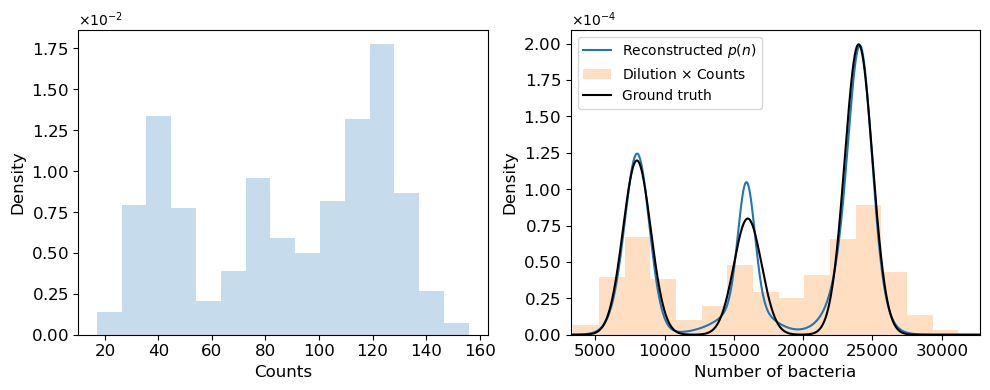

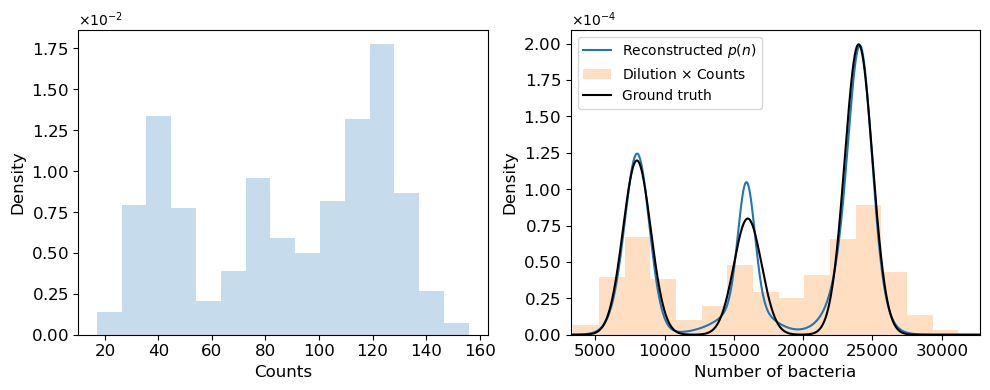

In [16]:
data3.make_plot('graphs/synth/multimodal_easier.png'.format(th_gt.numpy()),th_gt,xlabel='sci')